# Machine Learning SoSe21 Practice Class

Dr. Timo Baumann, Dr. Özge Alaçcam, Björn Sygo <br>
Email: baumann@informatik.uni-hamburg.de, alacam@informatik.uni-hamburg.de, 6sygo@informatik.uni-hamburg.de

## Exercise 1
**Description:** Implement linear regression with gradient descent <br>
**Deadline:** Saturday, 24. April 2021, 23:59 <br>
**Working together:** You can work in pairs or triples but no larger teams are allowed. <br>
&emsp;&emsp;&emsp; &emsp; &emsp; &emsp; &emsp; Please adhere to the honor code discussed in class. <br>
&emsp;&emsp;&emsp; &emsp; &emsp; &emsp; &emsp; All members of the team must get involved in understanding and coding the solution.

## Submission: 
**Linus Geewe, Christoph Brauer, Moritz Lahann**

*Also put high-level comments that should be read before looking at your code and results.*

### Goal

1. The goal is to find a function <br>
 $ h_{\theta}(\textbf{x}) = \theta_{0} + \theta_{1} x^{(1)}  + \theta_{2} x^{(2)} + ... +\theta_{D}x^{(D)} $ <br>
that approximates the function $sin(2 \pi)$ based on some $m$ training observations.

2. Our model is a polynomial model, i.e., we use a polynomial function where $x^{j}$ is the $j$'th feature of $x$.

3. You will also need to compute the root mean squared error of your model as compared to the desired outcomes in your $m$ training samples:<br>
$E_{RMS}= \sqrt{2E(\theta)/m}$, where<br>
$E(\theta) = \frac{1}{2} \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 $ is the model's squared error over all training samples.

In [177]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

### Generate your training samples

**Task 1** (10%):  Generate $m$ artificial data points $(x_{i}; y_{i})$ where each $x_i$ is randomly generated from the interval [0,1] and
$y_{i} = sin(2 \pi x_{i}) + \varepsilon $. Here, $\varepsilon$ is a random noise value in the interval [-0.3; 0.3].

Plot your data.

In [178]:
def generate_datapoints(amount):
    random_x = []
    for _ in range(amount):
        random_x.append(random.uniform(0, 1))

    random_y = []
    for x in random_x:
        random_y.append(math.sin(2 * math.pi * x) + random.uniform(-0.3, 0.3))
    
    return random_x, random_y

    

In [179]:
m = 100
x, y = generate_datapoints(m)

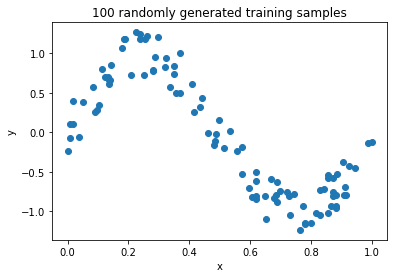

In [180]:
plt.scatter(x, y)
plt.title(f"{m} randomly generated training samples")
plt.ylabel("y")
plt.xlabel("x")
plt.show()

### Define your initial values

**Task 2** (5%): Define your initial learning rate constant $\alpha$.

Also define your polynomial degree $D$ and create the initial polynomial parameters $\theta_i$. These should be randomly generated in the interval [-0.5,0.5].

In [181]:
alpha = 0.001
degree = 5
m = 100


In [182]:
def initial_params(degrees):
    params = []
    for _ in range(degrees):
        params.append(random.uniform(-0.5, 0.5))
    return params



In [183]:
initial_params(5)

[-0.4300036801898629,
 0.39762581304484923,
 -0.13772588033619915,
 0.10750828197756535,
 0.03755597052005433]

### Stochastic Gradient Descent

Loop {<br>
&emsp;    for $i:=1$ to $m$ { <br>
&emsp;&emsp;        $\theta_j := \theta_j + \alpha[y_i - h_{\theta}(x_i)](x_i)_{(j)} $ (for every j)<br>
&emsp;    }<br>
}

where:

* $i$ is an index defined over the number of data points, from $i=1$ to $m$
* $j$ is an index defined over the terms of the polynomial, from $j=0$ to $j=D$
* The last factor $(x_i)_{(j)}$ means: the factor multiplying parameter $\theta_j$ in the polynomial function, which in this case will be $x_i$ to the power of $j$.
* loop for a given number of *epochs*; you may need a large number of epochs to get a good fit (e.g. 10000).

**Task 3** (40%):  Implement in Python the Stochastic Gradient Descent algorithm to solve the regression problem using the datapoints you generated.

In [184]:
def hypothesis(x, params):
    sum = 0
    for param_index, param in enumerate(params):
        sum += param * (x ** param_index)
    
    return sum

#pro sample
def update_step(x, y, params, learning_rate):
    updated_params = []
    for param_index, param in enumerate(params):
        updated_params.append(param + (learning_rate * (y - hypothesis(x, params)) *  (x ** param_index)))

    return updated_params

def training_loop(x_samples, y_targets, params, learning_rate, nr_epochs):
    new_params = params
    for epoch in range(nr_epochs):
        for x, y in zip(x_samples, y_targets):
            new_params = update_step(x, y, new_params, learning_rate)

    return new_params



In [185]:
#test
hypothesis(2, [1, 1, 1, 1, 1, 1])

63

In [186]:
#test
x_test, y_test = generate_datapoints(1)
start_params = initial_params(5)
print(start_params)
new_params = update_step(x_test[0], y_test[0], start_params, 0.02)
print(new_params)


[0.11609663553783423, -0.12436678243135535, 0.38540907612393194, -0.26008749432824463, 0.31180589559192917]
[0.08872797959305798, -0.1454886621848313, 0.3691081731778576, -0.272667787368385, 0.30209699949584407]


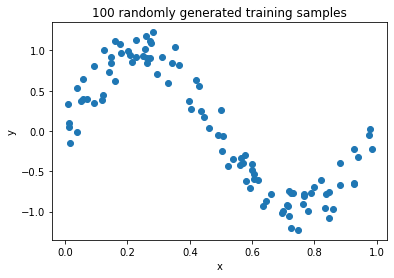

[-0.16117388385131048, 0.4443613842027212, 0.017128690008523018, -0.10542673819469695, 0.27764123279548114]
[0.110042148391729, 7.1236851950973765, -15.920295834419386, -3.3018240899387354, 12.370252988263946]


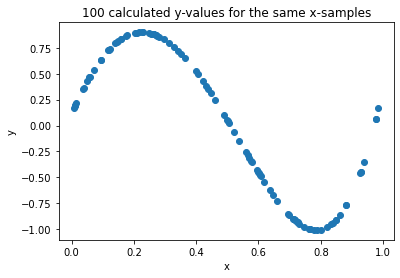

In [187]:
alpha = 0.01
#degree 5 -> funktion 4. Grades
degree = 5
m = 100
nr_epochs = 10000

samples_x, samples_y = generate_datapoints(m)

plt.scatter(samples_x, samples_y)
plt.title(f"{m} randomly generated training samples")
plt.ylabel("y")
plt.xlabel("x")
plt.show()

start_params = initial_params(degree)
print(start_params)

new_params = training_loop(samples_x, samples_y, start_params, alpha, nr_epochs)

print(new_params)
guessed_y = []
for x in samples_x:
    guessed_y.append(hypothesis(x, new_params))
plt.scatter(samples_x, guessed_y)
plt.title(f"{m} calculated y-values for the same x-samples")
plt.ylabel("y")
plt.xlabel("x")
plt.show()


**Task 4** (15%): Implement the root mean squared error metric to measure the performance of your polynomial model wrt. your data.

In [188]:
def error_rms(x_samples, y_samples, model_params):
    sum = 0
    for x, y in zip(x_samples, y_samples):
        sum += (hypothesis(x, model_params) - y) ** 2

    #print(len(x_samples))
    return math.sqrt(2 * 0.5 * sum / len(x_samples))


print(error_rms(samples_x, samples_y, new_params))

0.19404725333463554


### Training a model

**Task 5** (15%): Train a polynomial model using your artifically created data; take note of the error of your model over the course of the training epochs. 

Plot (in one plot, using different colors): 
1. the data points, 
2. the original sine function, and 
3. the learned polynomial function.

Plot a second graph showing the error curve. It should clearly illustrate how the error of your model decreases as the number of iterations increases.

Report the parameters of the model.

In [189]:
def training_loop_error(x_samples, y_targets, params, learning_rate, nr_epochs):
    new_params = params
    errors = []
    for epoch in range(nr_epochs):
        for x, y in zip(x_samples, y_targets):
            new_params = update_step(x, y, new_params, learning_rate)
        errors.append(error_rms(x_samples, y_targets, new_params))

    return new_params, errors

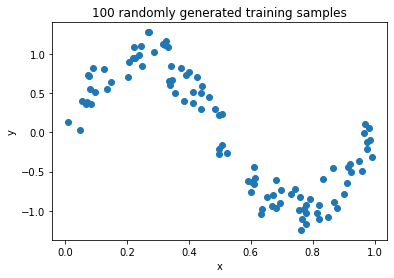

[0.18188966115768246, 0.2490559983317815, -0.10282500721134946, -0.23016911733510714, -0.4478287140213988]
[0.0835702655491277, 7.424182951023446, -15.817288433532484, -4.434520371557102, 13.02465884117778]


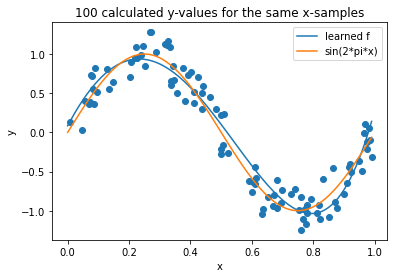

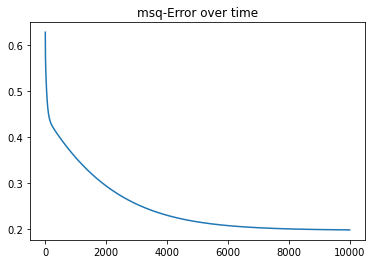

learning rate: 0.01, number of Thetas = 5, epochs = 10000, samples = 100


In [190]:
alpha = 0.01
#degree 5 -> funktion 4. Grades
degree = 5
m = 100
nr_epochs = 10000

samples_x, samples_y = generate_datapoints(m)

plt.scatter(samples_x, samples_y)
plt.title(f"{m} randomly generated training samples")
plt.ylabel("y")
plt.xlabel("x")
plt.show()

start_params = initial_params(degree)
print(start_params)

new_params, errors = training_loop_error(samples_x, samples_y, start_params, alpha, nr_epochs)

def sinus_datapoints():
    x = []
    y = []
    for i in range(0, 100, 1):
        x.append(i/100)
        y.append(math.sin(2 * math.pi * i/100))

    
    return x, y

def learned_function_datapoint(params):
    x = []
    y = []
    for i in range(0, 100, 1):
        x.append(i/100)
        y.append(hypothesis(i/100, params))

    
    return x, y


print(new_params)
guessed_y = []
for x in samples_x:
    guessed_y.append(hypothesis(x, new_params))


x_learned, y_learned = learned_function_datapoint(new_params)
x_sinus, y_sinus = sinus_datapoints()

plt.plot(x_learned, y_learned, label = "learned f") #gelernte Funktion
plt.scatter(samples_x, samples_y) #sample Werte
plt.plot(x_sinus, y_sinus, label = "sin(2*pi*x)") #sinus Werte



plt.title(f"{m} calculated y-values for the same x-samples")
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.show()



def error_plot(nr_epochs, errors):
    time = list(range(nr_epochs))
    plt.plot(time, errors)
    plt.title("msq-Error over time")
    plt.show()

error_plot(nr_epochs, errors)


print(f"learning rate: {alpha}, number of Thetas = {degree}, epochs = {nr_epochs}, samples = {m}")

### Experiment with the meta-parameters

**Task 6** (15%): Try different values for $\alpha$, $D$, $m$, and the number of epochs to investigate their effect on the learning process.

Report how the model performance is influenced by changes to each of the meta-parameters and discuss your findings.

In [191]:
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.3]
nr_thetas = [2, 3, 4, 5, 100]
nr_samples = [5, 33, 100, 250, 500]
nr_epochs = [1, 100, 1000, 10000, 25000]


def experiment(learning_rate = 0.01, nr_thetas = 5, nr_samples = 100, nr_epochs = 10000):
    samples_x, samples_y = generate_datapoints(nr_samples)
    start_params = initial_params(nr_thetas)
    new_params, errors = training_loop_error(samples_x, samples_y, start_params, learning_rate, nr_epochs)
    error_plot(nr_epochs, errors)
    print(f"final rms-error: {errors[-1]}")




Initialwerte: learning_rate = 0.01, nr_thetas = 5, nr_samples = 100, nr_epochs = 10000


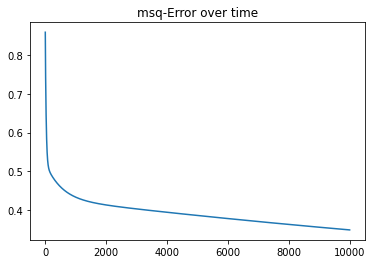

final rms-error: 0.3484393698294197
learning rate: 0.001
--------------------------------------


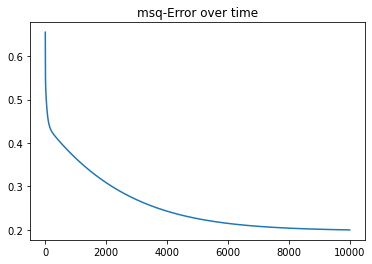

final rms-error: 0.19955994424112747
learning rate: 0.01
--------------------------------------


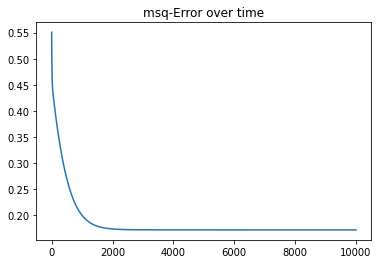

final rms-error: 0.17240041280629742
learning rate: 0.05
--------------------------------------


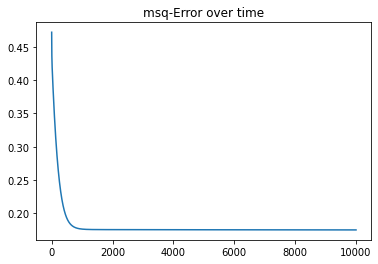

final rms-error: 0.17487339171669283
learning rate: 0.1
--------------------------------------


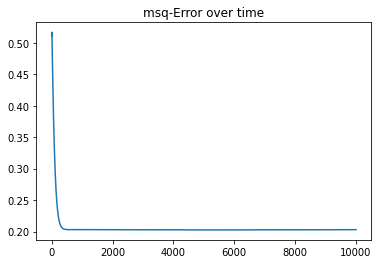

final rms-error: 0.202960388161291
learning rate: 0.3
--------------------------------------


In [192]:
###Learning rates
print("Initialwerte: learning_rate = 0.01, nr_thetas = 5, nr_samples = 100, nr_epochs = 10000")

for lr in learning_rates:
    experiment(learning_rate = lr)
    print(f"learning rate: {lr}")
    print("--------------------------------------")

Initialwerte: learning_rate = 0.01, nr_thetas = 5, nr_samples = 100, nr_epochs = 10000


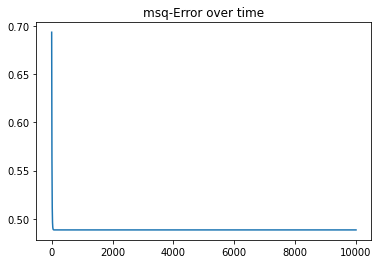

final rms-error: 0.4883675573419901
number of Thetas: 2
--------------------------------------


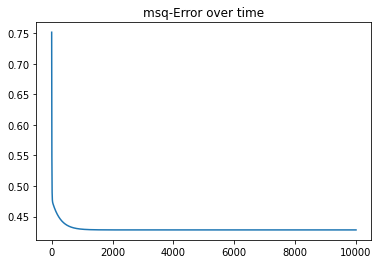

final rms-error: 0.4281589414454584
number of Thetas: 3
--------------------------------------


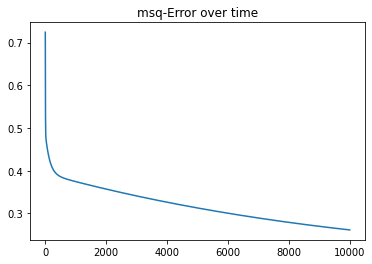

final rms-error: 0.2614408238640784
number of Thetas: 4
--------------------------------------


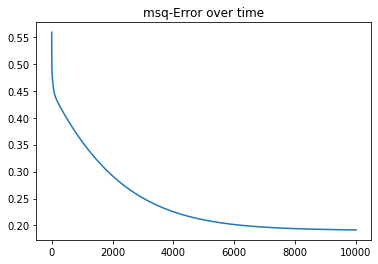

final rms-error: 0.19179135418579307
number of Thetas: 5
--------------------------------------


KeyboardInterrupt: 

In [193]:
###Parameters
print("Initialwerte: learning_rate = 0.01, nr_thetas = 5, nr_samples = 100, nr_epochs = 10000")

for nr in nr_thetas:
    experiment(nr_thetas = nr)
    print(f"number of Thetas: {nr}")
    print("--------------------------------------")

Initialwerte: learning_rate = 0.01, nr_thetas = 5, nr_samples = 100, nr_epochs = 10000


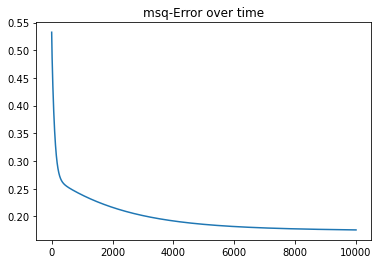

final rms-error: 0.17571718427425384
number of samples: 5
--------------------------------------


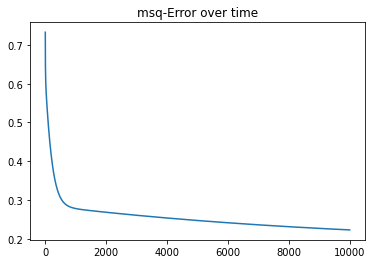

final rms-error: 0.22262496649709987
number of samples: 33
--------------------------------------


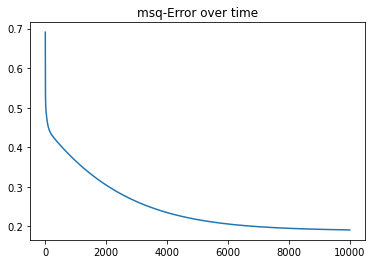

final rms-error: 0.19097596064167752
number of samples: 100
--------------------------------------


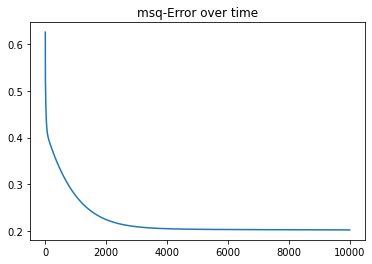

final rms-error: 0.20261049439241868
number of samples: 250
--------------------------------------


KeyboardInterrupt: 

In [194]:
###Number of Samples
print("Initialwerte: learning_rate = 0.01, nr_thetas = 5, nr_samples = 100, nr_epochs = 10000")

for nr in nr_samples:
    experiment(nr_samples = nr)
    print(f"number of samples: {nr}")
    print("--------------------------------------")

Initialwerte: learning_rate = 0.01, nr_thetas = 5, nr_samples = 100, nr_epochs = 10000


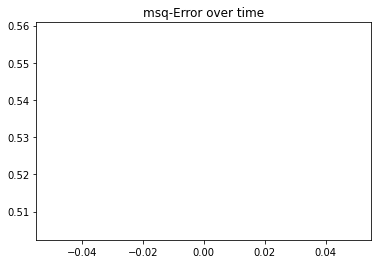

final rms-error: 0.5316349251174903
number of epochs: 1
--------------------------------------


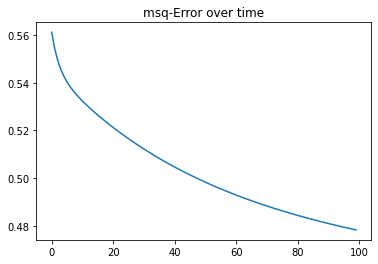

final rms-error: 0.47831745764741007
number of epochs: 100
--------------------------------------


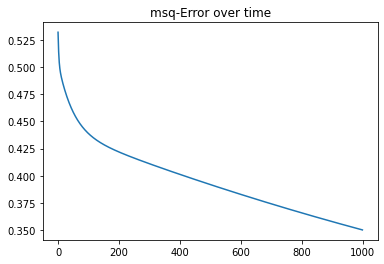

final rms-error: 0.35002850806675273
number of epochs: 1000
--------------------------------------


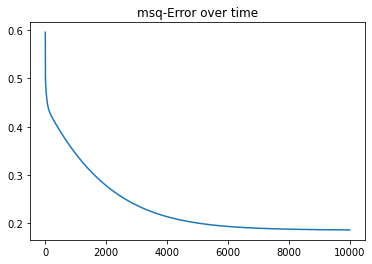

final rms-error: 0.18592126421664662
number of epochs: 10000
--------------------------------------


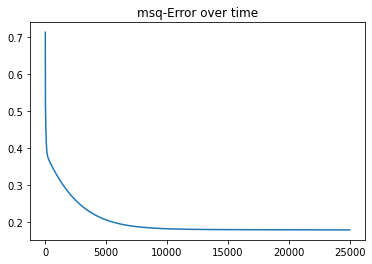

final rms-error: 0.17834126279170226
number of epochs: 25000
--------------------------------------


In [195]:
###Number of Epochs
print("Initialwerte: learning_rate = 0.01, nr_thetas = 5, nr_samples = 100, nr_epochs = 10000")

for nr in nr_epochs:
    experiment(nr_epochs = nr)
    print(f"number of epochs: {nr}")
    print("--------------------------------------")

### Hint

A good initial value for $m$ is 100. You can also simply use a function that each time it is called generates a new point from the distribution above, i.e., you set $m$ to $\infty$; in that case you must of course limit the number of samples chosen per iteration (how about 1?) and for evaluating the model (something >1).

A good initial value for $D$ is 5.

A good initial value for $\alpha$ is 0.001.

### Report Submission

Prepare a report of your solution as a commented Jupyter notebook (using markdown for your results and comments); include figures and results.
If you must, you can also upload a PDF document with the report annexed with your Python code.

Upload your report file to the Machine Learning Moodle Course page. Please make sure that your submission team corresponds to the team's Moodle group that you're in.